In [ ]:
from google.colab import drive
 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from sklearn.utils import shuffle
from keras.utils import to_categorical
%matplotlib inline

In [ ]:
TRAIN_CSV_PATH = r'/content/drive/MyDrive/Group_13/Text Proccesing/DATASET_10/TRAIN/multimodal_train.csv'
TEST_CSV_PATH = r'/content/drive/MyDrive/Group_13/Text Proccesing/DATASET_10/TEST/multimodal_test.csv'
VALIDATE_CSV_PATH = r'/content/drive/MyDrive/Group_13/Text Proccesing/DATASET_10/VALIDATE/multimodal_validate.csv'

In [ ]:
train_df = pd.read_csv(TRAIN_CSV_PATH)
train_df = shuffle(train_df)

In [ ]:
X_train = train_df.iloc[:,3].values
X_train

array(['are you there mate',
       'how many people havent had sex in the past month',
       'romanian farmville fans claim ps in government subsidies for fake cows',
       ...,
       'student shakes off threats to win miss iraq in name of womens rights',
       'the album cover of shouting and pointing by mott featuring you guessed it shouting and pointing',
       'oh no hes multiplying'], dtype=object)

In [ ]:
y_train = train_df.iloc[:,15].values
y_train

array([0, 1, 1, ..., 1, 1, 0])

In [ ]:
print('Shape of training data: ')
print(X_train.shape)
print(y_train.shape)

Shape of training data: 
(56400,)
(56400,)


In [ ]:
test_df = pd.read_csv(TEST_CSV_PATH)
test_df = shuffle(test_df)

In [ ]:
X_test = test_df.iloc[:,3].values
X_test

array(['baby peeking through a hole',
       'i found a piece of ancient seabed on a california mountain',
       'soviet and us forces finally meet in berlin', ...,
       'now a days chips bags are packed with nitrogen to protect them but this old new era chip can explains how they protected chips by packing them full',
       'dog with elephant shadow', 'this blindfolded food taster'],
      dtype=object)

In [ ]:
y_test = test_df.iloc[:,15].values
y_test

array([1, 1, 0, ..., 1, 1, 1])

In [ ]:
print('Shape of test data: ')
print(X_test.shape)
print(y_test.shape)

Shape of test data: 
(5930,)
(5930,)


In [ ]:
val_df = pd.read_csv(VALIDATE_CSV_PATH)
val_df = shuffle(val_df)

In [ ]:
X_val = val_df.iloc[:,3].values
X_val

array(['there was a double rainbow today',
       'charity matchmaker connects givers and receivers',
       'please no more', ..., 'this is fry he fries things', 'cutouts',
       'taliban sneak back into kandahar dressed as grape farmers'],
      dtype=object)

In [ ]:
y_val = val_df.iloc[:,15].values
y_val

array([1, 1, 0, ..., 0, 0, 1])

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
max_len = 100
max_words = 1000
tk = Tokenizer(num_words=max_words,
filters='!"#$%&()*+,-./:;<=>?@[\]^_`{"}~\t\n',lower=True, split=" ")
tk.fit_on_texts(X_train)
X_train_seq = tk.texts_to_sequences(X_train)
X_test_seq = tk.texts_to_sequences(X_test)

X_train_seq_trunc = pad_sequences(X_train_seq, maxlen=max_len)
X_test_seq_trunc = pad_sequences(X_test_seq, maxlen=max_len)

In [ ]:
def RNN():
    inputs = tf.keras.Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(128,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [ ]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.RMSprop(),metrics=['accuracy'])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 100)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 100, 50)           50000     
_________________________________________________________________
lstm (LSTM)                  (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 128)               8320      
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 129   

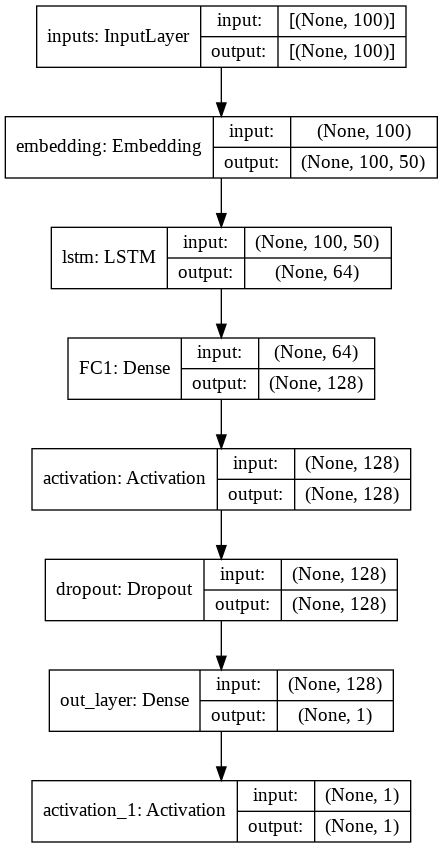

In [ ]:
from keras.utils import plot_model
plot_model(model,'MODEL.png',show_shapes=True)

In [ ]:
history = model.fit(X_train_seq_trunc ,y_train,epochs=25,
          validation_split=0.2)

Epoch 1/25
1410/1410 [==============================] - 74s 31ms/step - loss: 0.5519 - accuracy: 0.7151 - val_loss: 0.4804 - val_accuracy: 0.7667
Epoch 2/25
1410/1410 [==============================] - 43s 30ms/step - loss: 0.4727 - accuracy: 0.7811 - val_loss: 0.4750 - val_accuracy: 0.7718
Epoch 3/25
1410/1410 [==============================] - 43s 30ms/step - loss: 0.4630 - accuracy: 0.7870 - val_loss: 0.4666 - val_accuracy: 0.7773
Epoch 4/25
1410/1410 [==============================] - 43s 30ms/step - loss: 0.4645 - accuracy: 0.7856 - val_loss: 0.4716 - val_accuracy: 0.7749
Epoch 5/25
1410/1410 [==============================] - 43s 30ms/step - loss: 0.4480 - accuracy: 0.7931 - val_loss: 0.4646 - val_accuracy: 0.7791
Epoch 6/25
1410/1410 [==============================] - 43s 30ms/step - loss: 0.4385 - accuracy: 0.8023 - val_loss: 0.4628 - val_accuracy: 0.7803
Epoch 7/25
1410/1410 [==============================] - 43s 31ms/step - loss: 0.4335 - accuracy: 0.8023 - val_loss: 0.4647 -

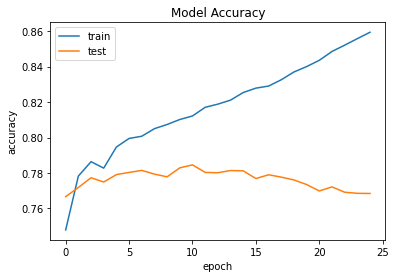

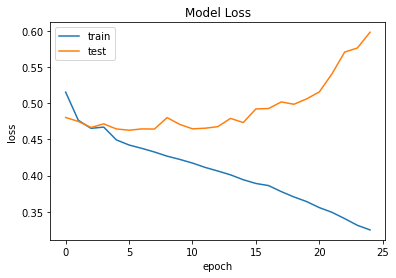

In [ ]:
# Model Outputs

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
accr = model.evaluate(X_test_seq_trunc ,y_test)

186/186 [==============================] - 1s 4ms/step - loss: 1.9090 - accuracy: 0.7489


In [ ]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 1.909
  Accuracy: 0.749
